# Imports

In [1]:
# Import data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Imports for machine learning
from sklearn import datasets
from sklearn.model_selection import train_test_split
# specifically for support vecotr machine (SVC), and the iris dataset
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Information About Iris Dataset

In [2]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Take a Look at Both Domain and Range

In [3]:
X = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(data=iris_data.target, columns=["iris_type"])

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

,iris_type
0,0
1,0
2,0
3,0
4,0


# Split the Data for Training and Testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

# Making the Model

In [7]:
# Instantiate the SVM classifier
svc = SVC(kernel="linear", C=1.0, gamma="auto")

In [8]:
# Fitting the model to training data
svc.fit(X_train, y_train)
# NOTE: the most important hyperparameter to understand is the kernel,
# because that controls how the SVC partitions our data!

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Making Predictions

In [9]:
y_pred = svc.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


# Assessing the Model

In [10]:
# Check 1: area the shapes of the predicted and test y values the same?
print(y_pred.shape)
print(y_test.shape)

(38,)
(38,)


In [11]:
# Score the model
svc.score(X_test, y_test)

0.9736842105263158

# Visualizing How the Model Works

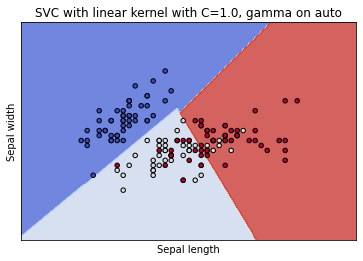

In [23]:
# The following is based off the Sklearn documentation, huge credit is due to: 
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
from sklearn.svm import LinearSVC
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = [SVC(kernel='linear', C=C, gamma='auto').fit(X, y)]

# title for the plots
titles = [('SVC with linear kernel with C=1.0, gamma on auto')]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots()
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, [sub]):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Grid Search for Parameter Selection

In [24]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.utils.validation import column_or_1d

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

y = column_or_1d(y, warn=True)
svc_param_selection(X, y, 5)

{'C': 0.1, 'gamma': 1}